# *installations and imports:*

In [1]:
!pip install openpyxl
!pip install transformers
!pip install pandas
!pip install img2table
!pip install pdf2image
!apt-get install poppler-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.20.2
    Uninstalling polars-0.20.2:
      Successfully uninstalled polars-0.20.2
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetche

In [2]:
import os
os.environ['PATH'] += ':/usr/bin' #setting poppler as PATH variable

In [17]:
import cv2
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
from PIL import Image as PILImage
from PIL import ImageChops
from img2table.document import Image as Img2TableImage
import numpy as np
from pdf2image import convert_from_path

# *taking input from the user:*

In [32]:
print("Insert the file path below: ")
print("The file can be an image file [.png, .jpeg, .jpg] or even a pdf file[.pdf] ")

c = 2
while c == 2:
    filepath = input("Enter the path here: ")
    fileext = os.path.splitext(filepath)[1].lower()

    if fileext in ['.png', '.jpg', '.jpeg']:
        print("File recognized as an image.")
        c = 0
    elif fileext == '.pdf':
        print("File recognized as a PDF.")
        c = 1
    else:
        print("Unsupported file format. Try again!")
        c = 2

Insert the file path below: 
The file can be an image file [.png, .jpeg, .jpg] or even a pdf file[.pdf] 
Enter the path here: /content/testimage7.pdf
File recognized as a PDF.


# *now if the file is an image nothing occurs, but if it is a pdf, we convert it to image(s)*

In [33]:
if c == 1:

  def convert_pdf_to_jpg(pdf_path, output_dir):
      if not os.path.exists(output_dir):
          os.makedirs(output_dir)

      filename = os.path.basename(pdf_path)
      output_path = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.jpg')

      try:
          images = convert_from_path(pdf_path)
          for i, img in enumerate(images):
              img_path = f'{output_path[:-4]}_{i}.jpg' if i > 0 else output_path
              img.save(img_path, 'JPEG')
      except Exception as e:
          print(f'Error converting {pdf_path}: {e}')
      else:
          print(f'Successfully converted {pdf_path} to {output_path}')
          return output_path

  pdf_path = filepath
  output_dir = os.path.dirname(filepath)
  newfilepath = convert_pdf_to_jpg(pdf_path, output_dir)

  # Update filepath variable to store the new JPG path
  filepath = newfilepath
  #print(filepath)

Successfully converted /content/testimage7.pdf to /content/testimage7.jpg


# *crop the image for more clarity:*

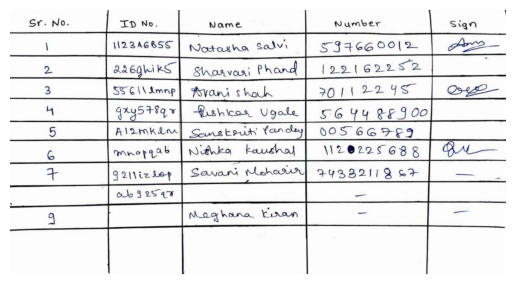

In [34]:
def trim(im):
    bg = PILImage.new("RGB", im.size, im.getpixel((0,0))) # im.mode, im.size, im.getpixel((0,0))
    diff = ImageChops.difference(im.convert("RGB"), bg) # im, bg
    diff = ImageChops.add(diff, diff, 2.0, -100) # diff, diff
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

im = PILImage.open(filepath)
im = trim(im)

plt.imshow(im)
plt.axis('off')
plt.show()
im.save('trimmedimage.png')

newfilepath = filepath.rsplit('/', 1)[0] + '/trimmedimage.png'
filepath = newfilepath

#print(filepath)

# *now we provide a choice, for preprocessing of the image:*

Would you like to preprocess the image (if it isn't already scanned with high contrast)?
Enter 1 for 'yes' and 0 for 'no': 1


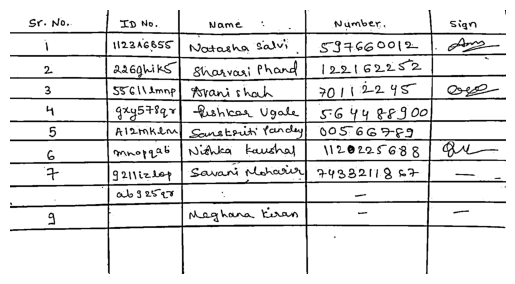

Preprocessed image saved successfully!

If the result above isn't as desired then enter a choice for which image you want to ultimately consider.
Enter 1 to select the preprocessed image, and enter 0 to keep the original image: 0


In [35]:
print("Would you like to preprocess the image (if it isn't already scanned with high contrast)?")

while True:
  k = input("Enter 1 for 'yes' and 0 for 'no': ")

  if k == '1':

    image = cv2.imread(filepath)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    binary_image = cv2.adaptiveThreshold(gray_image,255, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY, 15, 6)
    #binary_image = cv2.adaptiveThreshold(gray_image,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY, 15, 6)

    kernel = np.ones((1,1), np.uint8)
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    plt.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    img2 = PILImage.fromarray(dilated_image)
    img2.save('preprocessedimage.png')

    newfilepath = filepath.rsplit('/', 1)[0] + '/preprocessedimage.png'
    #print(newfilepath)

    print("Preprocessed image saved successfully!")
    print()
    print("If the result above isn't as desired then enter a choice for which image you want to ultimately consider.")

    while True:
      y=input("Enter 1 to select the preprocessed image, and enter 0 to keep the original image: ")
      if y == '1':
        filepath = newfilepath
        break
      elif y == '0':
        break
      else:
        print("Invalid input. Please try again.")
        continue

    #filepath = input("Enter the final image file path: ")
    break

  elif k == '0':
    print("You have chosen not to preprocess the image.")
    break

  else:
    print("Invalid input. Please try again.")

# *now we provide a visualization of the detected tabular structure for clarity:*

/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_h_lines.columns})
/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/deduplication.py:21: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_cells.columns})


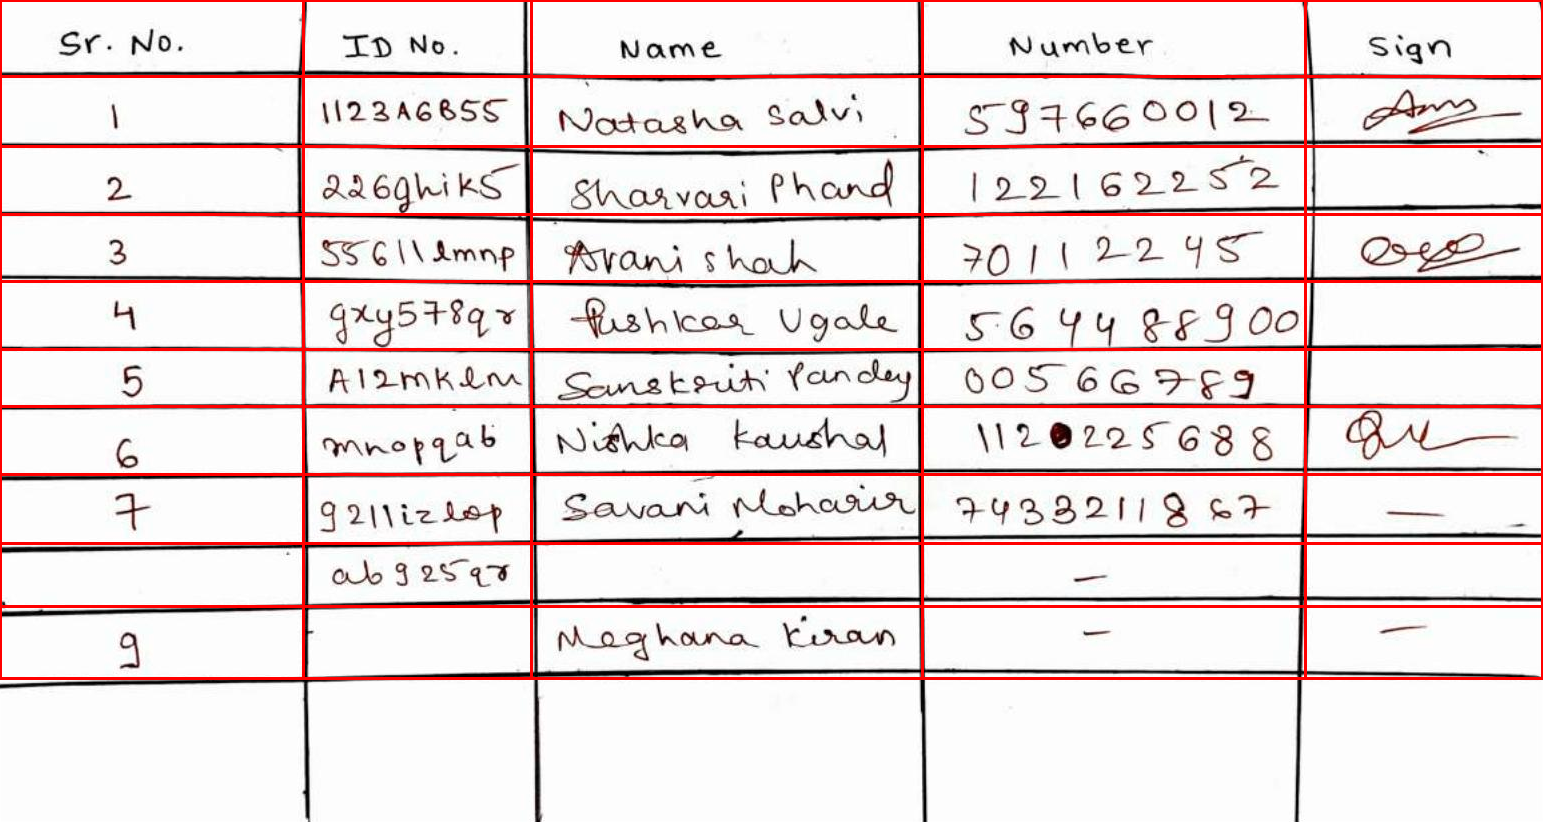

In [36]:
img = Img2TableImage(src=filepath)

extracted_tables = img.extract_tables(implicit_rows=True, borderless_tables=True)

table_img = cv2.imread(filepath)

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)

PILImage.fromarray(table_img)

# *now we perform the actual extraction of the data into an excel file:*

In [37]:
def initialize_trocr_model():
    processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
    return processor, model

def extract_tables_from_image(image_path):
    img = Img2TableImage(src=image_path)
    extracted_tables = img.extract_tables(implicit_rows=True, borderless_tables=True)
    return extracted_tables

def recognize_text_in_cell(cell_image, processor, model):
    try:
      pil_image = PILImage.fromarray(cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB))

      pixel_values = processor(images=pil_image, return_tensors="pt").pixel_values

      generated_ids = model.generate(pixel_values)
      generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

      return generated_text
    except Exception as e:
      print()
      print(f"Error processing image: {e}")
      #err = "unrecognized text"
      err = " "
      return err

def main():

    output_excel = input("Enter the desired output Excel file name (no extension required, just the name): ")
    output_excel = output_excel + ".xlsx"

    processor, model = initialize_trocr_model()

    extracted_tables = extract_tables_from_image(filepath)

    wb = Workbook()
    ws = wb.active

    for table_idx, table in enumerate(extracted_tables):
        print(f"Table {table_idx + 1}:")
        for id_row, row in enumerate(table.content.values(), start=1):
            for id_col, cell in enumerate(row, start=1):
                x1 = cell.bbox.x1
                y1 = cell.bbox.y1
                x2 = cell.bbox.x2
                y2 = cell.bbox.y2

                # Load the entire table image (optional for display)
                #table_image = cv2.imread(filepath)

                cell_image = cv2.imread(filepath)[y1:y2, x1:x2]

                # Display the cell image (optional)
                #plt.imshow(cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB))
                #plt.axis('off')
                #plt.show()

                recognized_text = recognize_text_in_cell(cell_image, processor, model)
                print(f"Table {table_idx + 1}, Row {id_row}, Column {id_col}: {recognized_text}")

                cell_address = get_column_letter(id_col) + str(id_row)
                ws[cell_address] = recognized_text

                column_letter = get_column_letter(id_col)
                column_dimensions = ws.column_dimensions[column_letter]
                column_dimensions.width = len(str(recognized_text)) + 12

    wb.save(output_excel)
    print("Excel file saved successfully!")

if __name__ == "__main__":
    main()

Enter the desired output Excel file name (no extension required, just the name): output


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Table 1:


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Table 1, Row 1, Column 1: sr. no.
Table 1, Row 1, Column 2: lidno. (
Table 1, Row 1, Column 3: name.
Table 1, Row 1, Column 4: 1 Number.
Table 1, Row 1, Column 5: tsign
Table 1, Row 2, Column 1: 0 1
Table 1, Row 2, Column 2: 1123address )
Table 1, Row 2, Column 3: Natasha salvi.
Table 1, Row 2, Column 4: sg7660012
Table 1, Row 2, Column 5: ( Army
Table 1, Row 3, Column 1: 2 2.
Table 1, Row 3, Column 2: 226ghigs.
Table 1, Row 3, Column 3: Sharvari Phand
Table 1, Row 3, Column 4: 122162252
Table 1, Row 3, Column 5: 0 1.
Table 1, Row 4, Column 1: 3 3
Table 1, Row 4, Column 2: 5561limnp.
Table 1, Row 4, Column 3: Aranishah.
Table 1, Row 4, Column 4: 70 1 1 2 2 4.5.
Table 1, Row 4, Column 5: jeore
Table 1, Row 5, Column 1: 4 1
Table 1, Row 5, Column 2: gXY578QB
Table 1, Row 5, Column 3: Pushicoe Ugale.
Table 1, Row 5, Column 4: 5.6.4664
Table 1, Row 5, Column 5: 1 1
Table 1, Row 6, Column 1: 0 5.
Table 1, Row 6, Column 2: aizmken.
Table 1, Row 6, Column 3: " Somskouiti Yandy
Table 1, Row 6,